<a href="https://colab.research.google.com/github/prasditama/abeam-business-data-analyst/blob/main/Practice/Bivariate_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

From the previous data there some detect some abnormalities such as ouliers and missing data, thus we need to cleanse the data. Reconfirm the anomaly to the person that took in charge.

For this moment, I would use the raw data as it is.

In [ ]:
# Define the data that is used
df = pd.read_csv('Practice_Data.csv')
df

,NO,Customer_ID,Response,Sex,Age,Job,questionnaire1,questionnaire2,questionnaire3,questionnaire4,questionnaire5,avg_charge,charge_avg_per_mon,charge_Monday,contraction_day,contraction_day_JP
0,1,80000018,no reply,F,35.0,NaN,0.0,0.0,0.0,0.0,0.0,28656.0,28656.0,NaN,7.0,Saturday
1,2,80000042,reply,M,39.0,general payer1,0.0,0.0,0.0,0.0,0.0,22815.0,29660.0,29320.0,3.0,Tuesday
2,3,80000234,no reply,F,43.0,NaN,0.0,0.0,0.0,0.0,0.0,11912.0,11912.0,13920.0,1.0,Sunday
3,4,80000273,no reply,F,45.0,NaN,0.0,0.0,0.0,0.0,0.0,3860.0,3860.0,NaN,4.0,Wednesday
4,5,80000529,no reply,M,33.0,general payer1,0.0,0.0,0.0,0.0,0.0,9483.0,9483.0,NaN,1.0,Sunday
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1288,1288,70100285,NaN,F,57.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1289,1289,70100286,NaN,M,18.0,NaN,0.0,0.0,0.0,0.0,0.0,NaN,NaN,4500.0,7.0,Saturday
1290,1290,70100287,NaN,M,35.0,general payer3,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN
1291,1291,70100288,NaN,F,32.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


# Analysing two categorical variables

In [ ]:
# Create crosstable for 'contraction_day' and 'contraction_day_JP'
crosstab = pd.crosstab(df['contraction_day'], df['contraction_day_JP'], margins=True)
print(crosstab)

contraction_day_JP  Friday  Monday  Saturday  Sunday  Thursday  Tuesday  \
contraction_day                                                           
1.0                      0       0         0     167         0        0   
2.0                      0     150         0       0         0        0   
3.0                      0       0         0       0         0      134   
4.0                      0       0         0       0         0        0   
5.0                      0       0         0       0       167        0   
6.0                    127       0         0       0         0        0   
7.0                      0       0       180       0         0        0   
All                    127     150       180     167       167      134   

contraction_day_JP  Wednesday   All  
contraction_day                      
1.0                         0   167  
2.0                         0   150  
3.0                         0   134  
4.0                       161   161  
5.0                  

# Analysing two continuous variables

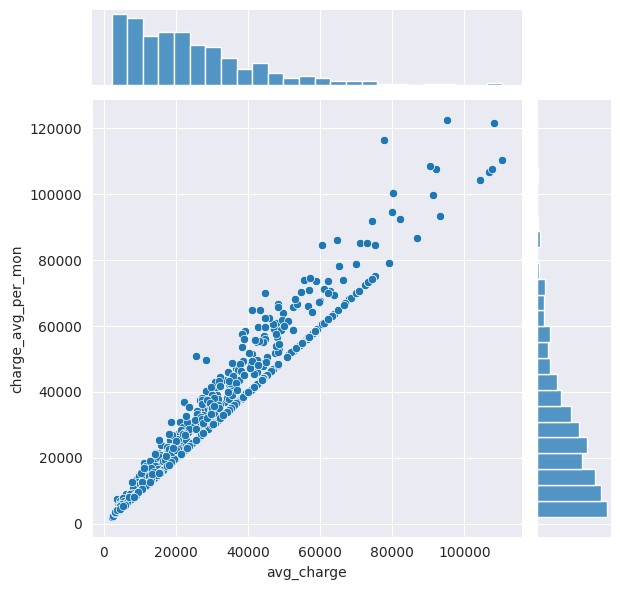

Correlation between avg_charge and charge_avg_per_mon: 0.9802514311729149


In [ ]:
# Create scatter plot for 'avg_charge' and 'charge_avg_per_mon'
sns.set_style('darkgrid')
sns.jointplot(x = 'avg_charge', y = 'charge_avg_per_mon', data=df)
plt.show()

# Showing correlation coefficient
#import numpy as np
#from scipy.stats import pearsonr

#x = df['avg_charge']
#y = df['charge_avg_per_mon']

#print(pearsonr(x, y))

# Convert relevant columns to numeric, handling errors
numeric_df = df.apply(pd.to_numeric, errors='coerce')
# Calculate correlation on numeric data only
correlation = numeric_df['avg_charge'].corr(numeric_df['charge_avg_per_mon'])
print(f"Correlation between avg_charge and charge_avg_per_mon: {correlation}")

# Analysing correlation of Response and each questionaire


In [ ]:
ct_1 = pd.crosstab(df['Response'], df['questionnaire1'], margins=True)
ct_2 = pd.crosstab(df['Response'], df['questionnaire2'], margins=True)
ct_3 = pd.crosstab(df['Response'], df['questionnaire3'], margins=True)
ct_4 = pd.crosstab(df['Response'], df['questionnaire4'], margins=True)
ct_5 = pd.crosstab(df['Response'], df['questionnaire5'], margins=True)
print(ct_1)
print(ct_2)
print(ct_3)
print(ct_4)
print(ct_5)

questionnaire1  0.0  1.0  2.0  3.0  4.0  5.0   All
Response                                          
no reply        843    0    0    0    0    0   843
reply            75   15   19   18   17   16   160
All             918   15   19   18   17   16  1003
questionnaire2  0.0  1.0  2.0  3.0  4.0  5.0   All
Response                                          
no reply        843    0    0    0    0    0   843
reply            75   18   14   15   21   17   160
All             918   18   14   15   21   17  1003
questionnaire3  0.0  1.0  2.0  3.0  4.0  5.0   All
Response                                          
no reply        843    0    0    0    0    0   843
reply            75   15   18   13   17   22   160
All             918   15   18   13   17   22  1003
questionnaire4  0.0  1.0  2.0  3.0  4.0  5.0   All
Response                                          
no reply        843    0    0    0    0    0   843
reply            75   21   14   17   15   18   160
All             918   21   14  